Problem 1: CLUSTERING

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.
Dataset for Problem 1: bank_marketing_part1_Data.csv

Data Dictionary for Market Segmentation:

1.spending: Amount spent by the customer per month (in 1000s)
2.advance_payments: Amount paid by the customer in advance by cash (in 100s)
3.probability_of_full_payment: Probability of payment done in full by the customer to the bank
4.current_balance: Balance amount left in the account to make purchases (in 1000s)
5.credit_limit: Limit of the amount in credit card (10000s)
6.min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7.max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [141]:
df=pd.read_csv("bank_marketing_part1_Data.csv")

In [138]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [142]:
df['spending']=df['spending']*1000
df['advance_payments']=df['advance_payments']*100
df['current_balance']=df['current_balance']*1000
df['credit_limit']=df['credit_limit']*10000
df['min_payment_amt']=df['min_payment_amt']*100
df['max_spent_in_single_shopping']=df['max_spent_in_single_shopping']*1000
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0


In [144]:
df.shape

(210, 7)

In [143]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

In [145]:
df.duplicated().sum()

0

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [147]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [148]:
def univariateAnalysis_numeric(column):
    if np.dtype(df[column]) == 'object':
        pass
    else:
        
        plt.figure()
        plt.subplot(2,2,1)
        plt.title("Distribution of " + column)
        plt.hist(df[column],color='g');
        plt.show()
        plt.subplot(2,2,2)
        plt.title("BoxPlot of " + column)
        sns.boxplot(x=df[column])
        plt.show()

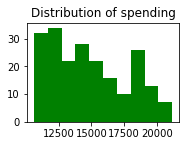

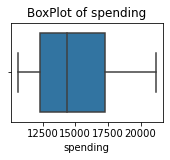

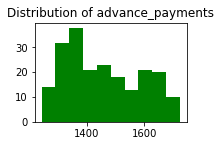

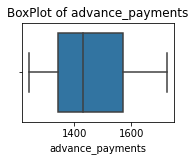

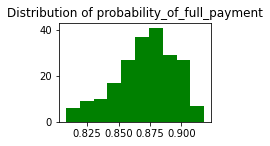

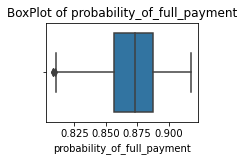

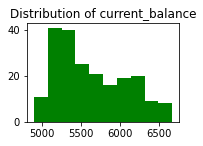

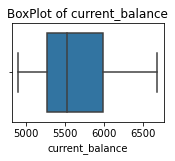

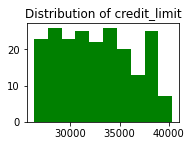

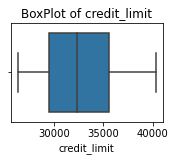

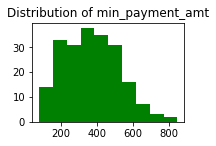

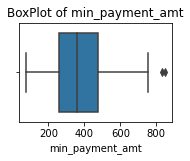

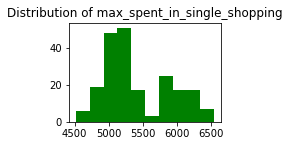

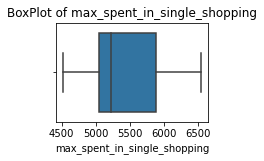

In [149]:
for x in df.columns:
    univariateAnalysis_numeric(x)

Probability_of_full_payment has outliers at lower end.
min_payment_amount has outliers at higher end.
Right skewed- Spending, Advance_payments, Current_balance, max_spent_in_single_shopping
Left skewed- Probability_of_full_payment, min_payment_amt

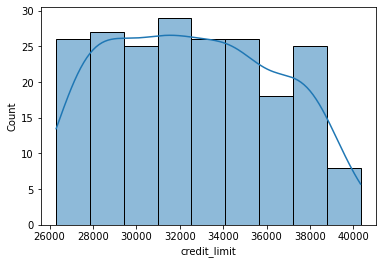

In [150]:
sns.histplot(data=df,x='credit_limit',kde=True);

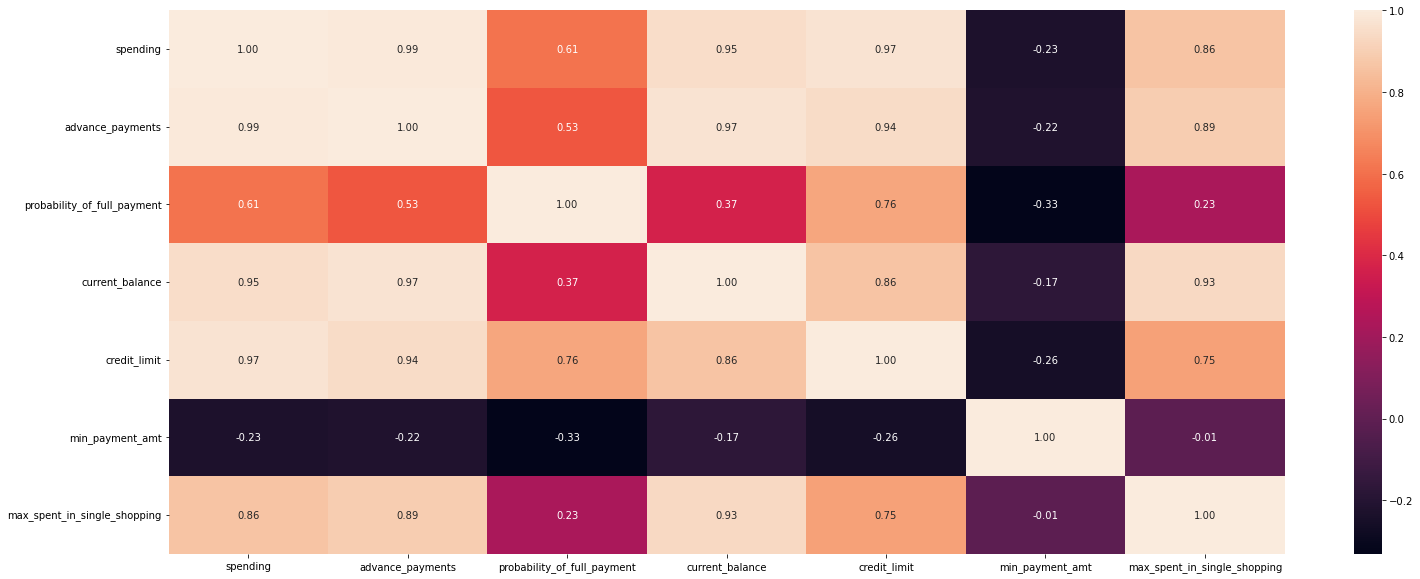

In [151]:
fig = plt.subplots(figsize=(25, 10))
sns.heatmap(df.corr(), annot=True,fmt='.2f')
plt.show()

Min_payment_amt has lowest correlation with other variables/factors.
Spending and Advance payments, Spending and credit_limit, Current balance and advance payments have higest correlation.

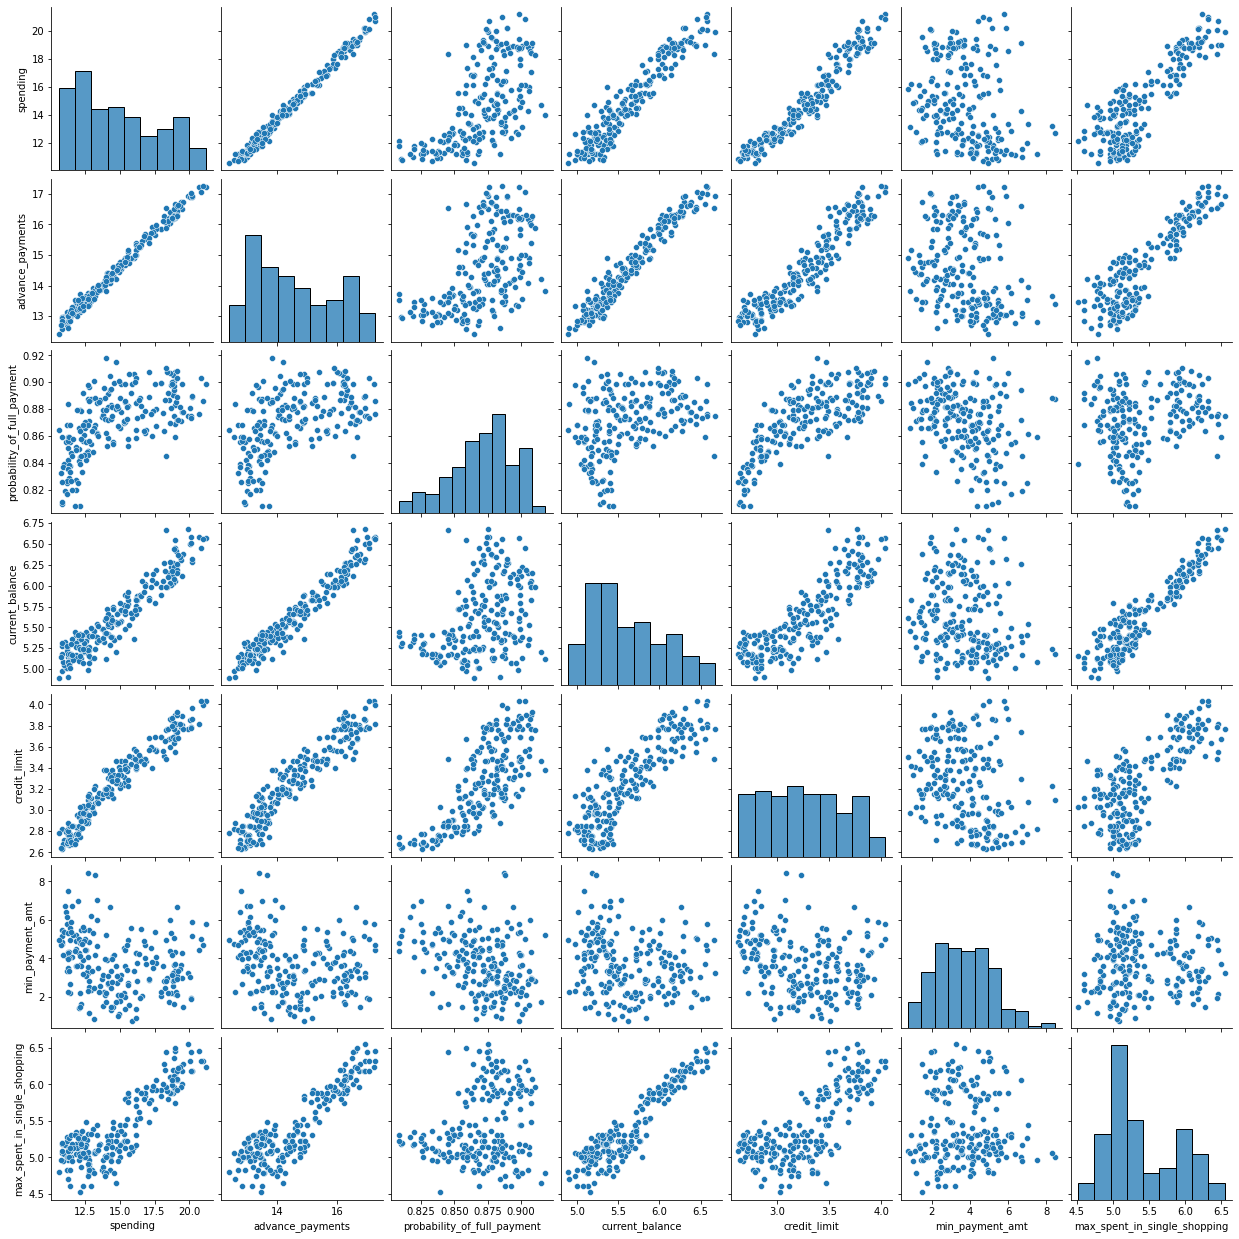

In [44]:
sns.pairplot(data = df);

1.2  Do you think scaling is necessary for clustering in this case? Justify

In [152]:
df.describe().round(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.00,210.00,210.00,210.00,210.00,210.00,210.00
mean,14847.52,1455.93,0.87,5628.53,32586.05,370.02,5408.07
std,2909.70,130.60,0.02,443.06,3777.14,150.36,491.48
min,10590.00,1241.00,0.81,4899.00,26300.00,76.51,4519.00
25%,12270.00,1345.00,0.86,5262.25,29440.00,256.15,5045.00
50%,14355.00,1432.00,0.87,5523.50,32370.00,359.90,5223.00
75%,17305.00,1571.50,0.89,5979.75,35617.50,476.88,5877.00
max,21180.00,1725.00,0.92,6675.00,40330.00,845.60,6550.00


The mean value of 
spending=14.85, adv payments=14.56, probability_of_full_payment=0.87, current_balance=5.63, credit_limit=3.26, min_payment_amt=3.70, max_spent_in_single_shopping=5.41. Each of them are further in terms of 100s, 1000s, 10000s. 
Scaling of the features is necessary for this case as not all the features in this dataset are of the same scale of measurement and the range of the features are not same. Hence, it is necessary to scale the dataset.
Scaling is done to make the data points closer to each other by reducing the distance. This will put the datapoints within a certain bracket and ease the porcessing and understanding of data.
Scaling can be done using zscore from scipy package or StandardScaler can be used from sklearn package.
Standar scaling makes the means of the data points=0, and standard devisation=1.

In [146]:
df.skew()

precision   -1.078280
recall      -0.929050
f1-score    -1.035172
support     -0.547324
dtype: float64

In [153]:
#Scaling dataset
from scipy.stats import zscore
df_scaled=df.apply(zscore)
df_scaled.head().round(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.75,1.81,0.18,2.37,1.34,-0.30,2.33
1,0.39,0.25,1.50,-0.60,0.86,-0.24,-0.54
2,1.41,1.43,0.50,1.40,1.32,-0.22,1.51
3,-1.38,-1.23,-2.59,-0.79,-1.64,0.99,-0.45
4,1.08,1.00,1.20,0.59,1.16,-1.09,0.87


In [154]:
df_scaled.describe().round(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.00,210.00,210.00,210.00,210.00,210.00,210.00
mean,0.00,0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.47,-1.65,-2.67,-1.65,-1.67,-1.96,-1.81
25%,-0.89,-0.85,-0.60,-0.83,-0.83,-0.76,-0.74
50%,-0.17,-0.18,0.10,-0.24,-0.06,-0.07,-0.38
75%,0.85,0.89,0.71,0.79,0.80,0.71,0.96
max,2.18,2.07,2.01,2.37,2.06,3.17,2.33


1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

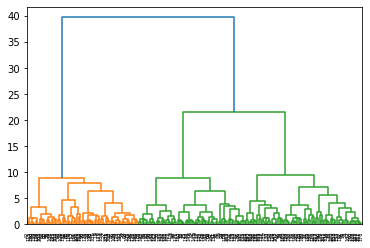

In [155]:
#Hierarchial clustering
from scipy.cluster.hierarchy import dendrogram,linkage
wardlink=linkage(df_scaled,method='ward')
d=dendrogram(wardlink)

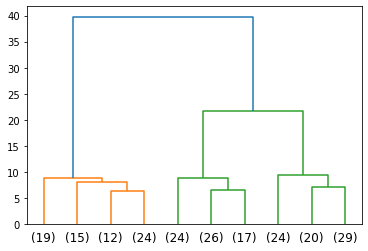

In [118]:
#truncated dendrogram for last 10 cluster merges
d=dendrogram(wardlink,truncate_mode='lastp',p=10)

In [156]:
#Fcluster function creates maximum of 10 clusters
from scipy.cluster.hierarchy import fcluster
clusters=fcluster(wardlink,3,criterion="maxclust")
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [157]:
clusterss=fcluster(wardlink,23,criterion="maxclust")
clusterss

array([ 6, 23,  8, 10,  7, 13, 11, 18,  6, 12,  8, 20, 11,  6, 18, 15, 22,
       12, 18, 11, 12, 15,  7, 11, 23,  2, 18, 10,  9, 14, 18, 12, 11, 22,
       10, 10, 14, 15, 10,  6,  8, 23,  1,  6, 10, 12, 18,  8,  3,  8, 11,
        3,  3,  6,  8,  2, 15, 11,  9,  1, 23, 12,  9, 20, 19,  8,  4, 23,
        8, 12, 18, 12,  6,  4, 15,  8, 19, 10,  2, 23, 19, 16, 19,  3,  9,
       20, 20,  2,  2, 13, 21,  4, 19,  9, 12,  8,  6,  2,  9,  1, 15,  6,
       23,  8, 22,  5,  5, 15, 15,  3, 20, 23,  4, 15, 10,  1, 18, 21, 14,
        4, 18, 10, 15, 11, 19, 19,  8,  9, 23, 23,  9, 19, 16,  6, 11,  1,
        5, 12,  3, 21, 21, 22,  9, 12, 18, 11,  8,  9, 18, 11, 19, 12, 23,
       20, 16, 23, 18,  9, 22,  1,  4, 12,  8,  2,  8, 12,  2, 19, 16, 17,
       22, 10, 23,  8,  6,  8, 23, 17,  7, 12, 19, 18, 16, 19,  7,  2, 17,
       20, 16, 10, 16, 23, 10,  1, 22,  2,  8, 15,  6, 10, 22,  7, 23, 14,
        2, 21,  2, 18,  7, 20], dtype=int32)

In [158]:
#Using distance to make clusters
clusters2=fcluster(wardlink,3,criterion="distance")
clusters2

array([ 6, 25,  8, 10,  7, 13, 11, 18,  6, 12,  8, 21, 11,  6, 19, 15, 23,
       12, 18, 11, 12, 15,  7, 11, 25,  2, 19, 10,  9, 14, 18, 12, 11, 23,
       10, 10, 14, 15, 10,  6,  8, 24,  1,  6, 10, 12, 19,  8,  3,  8, 11,
        3,  3,  6,  8,  2, 15, 11,  9,  1, 25, 12,  9, 21, 20,  8,  4, 24,
        8, 12, 19, 12,  6,  4, 15,  8, 20, 10,  2, 24, 20, 16, 20,  3,  9,
       21, 21,  2,  2, 13, 22,  4, 20,  9, 12,  8,  6,  2,  9,  1, 15,  6,
       25,  8, 23,  5,  5, 15, 15,  3, 21, 25,  4, 15, 10,  1, 19, 22, 14,
        4, 19, 10, 15, 11, 20, 20,  8,  9, 25, 25,  9, 20, 16,  6, 11,  1,
        5, 12,  3, 22, 22, 23,  9, 12, 18, 11,  8,  9, 19, 11, 20, 12, 25,
       21, 16, 24, 18,  9, 23,  1,  4, 12,  8,  2,  8, 12,  2, 20, 16, 17,
       23, 10, 24,  8,  6,  8, 25, 17,  7, 12, 20, 18, 16, 20,  7,  2, 17,
       21, 16, 10, 16, 25, 10,  1, 23,  2,  8, 15,  6, 10, 23,  7, 25, 14,
        2, 22,  2, 19,  7, 21], dtype=int32)

In [159]:
clusters3=fcluster(wardlink,23,criterion="distance")
clusters3

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

The entire dataset can be clustered into 2 distinct groups.
1st cluster-Orange has (19+15+12+24) number of items in total
2nd cluster-Green has (24+26+17+24+20+29) number of items in total

Agglomerative clustering is a bottom up approach where each object starts off as a sepaarate group. closer and similar the groups are merged. This helps idnetify small clusters.
Dendrograms follow this approach, it is used to find the optimal number of clusters in a dataset by a treelink diagram that summarizes the process of clustering. 
x-axis - Records, y-axis-distance between records
Similar records are joined by lines whose vertical length reflects the distance between the records.

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [160]:
from sklearn.cluster import KMeans

In [161]:
k_means=KMeans(random_state=0,n_clusters=2)
k_means.fit(df_scaled)
k_means.labels_
print(k_means.inertia_)

659.1717544870407


k=1, 1470.0000000000002
k=2, k_means_inertia=659.1717544870406
k=3, 430.6589731513006
k=5, 328.18024714217296

C:\Users\Sanjana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1470.0000000000005, 659.1717544870407, 430.65897315130064, 371.7465598479138, 327.4732055881967, 288.95334686682867, 262.57071771489365, 243.31234931019875, 226.22966979419465, 206.19389928604542]


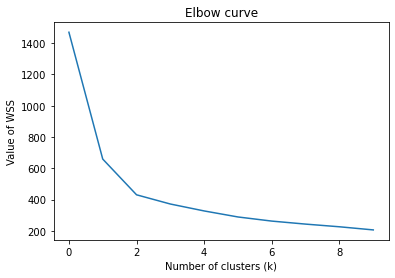

In [162]:
#visualization of wss
wss=[]
for i in range (1,11):
    KM=KMeans(n_clusters=i)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)
plt.title("Elbow curve")
plt.xlabel('Number of clusters (k)')
plt.ylabel('Value of WSS')
plt.plot(range(0,10),wss);
print(wss)


WSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WSS with the K-value, the plot looks like an Elbow. As the number of clusters increases, the WSS value decreases. WSS value is the largest at k=1.From the graph, it is clearly seen that the WSS value takes a major drop at k=2 (point of inflection) further which the drop is low,and hence this point is chosen as the optimal number of clusters.

In [163]:
k_means=KMeans(n_clusters=3)
k_means.fit(df_scaled)
l=k_means.labels_
print(l)
print(k_means.inertia_)

[0 2 0 1 0 1 1 2 0 1 0 2 1 0 2 1 2 1 1 1 1 1 0 1 2 0 2 1 1 1 2 1 1 2 1 1 1
 1 1 0 0 2 0 0 1 1 2 0 0 0 1 0 0 0 0 0 1 1 1 0 2 1 1 2 2 0 0 2 0 1 2 1 0 0
 1 0 2 1 0 2 2 2 2 0 1 2 0 2 0 1 2 0 2 1 1 0 0 0 1 0 2 0 2 0 2 0 0 1 1 0 2
 2 0 1 1 0 2 2 1 0 2 1 1 1 2 2 0 1 2 2 1 2 2 0 1 0 0 1 0 2 2 2 1 1 2 1 0 1
 2 1 2 1 2 2 1 2 2 1 2 0 0 1 0 0 0 1 2 2 2 1 2 1 2 0 0 0 2 1 2 1 2 2 2 2 0
 0 1 2 2 1 1 2 1 0 2 0 0 1 0 1 2 0 2 1 0 2 0 2 2 2]
430.65897315130064


In [164]:
#adding clusters column to the original dataset
df['cluster_kmeans']=l

In [165]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_kmeans
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,0
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,2
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,0
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,1
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,0


In [166]:
#Calculating silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
print(silhouette_score(df_scaled,l).round(2))
#calculating individual sil_width
s_width=silhouette_samples(df_scaled,l)
s_width

0.4


array([0.57369874, 0.36638639, 0.63778363, 0.51245819, 0.36227633,
       0.21844638, 0.4728666 , 0.36181217, 0.52028453, 0.5325168 ,
       0.46759191, 0.13224116, 0.38966769, 0.5247812 , 0.11221528,
       0.22129574, 0.33795723, 0.49990157, 0.03155344, 0.2357566 ,
       0.35903729, 0.36612754, 0.43277307, 0.26136159, 0.47570507,
       0.06575223, 0.2717924 , 0.50389413, 0.55352814, 0.43430599,
       0.37707319, 0.42823997, 0.38827268, 0.39498208, 0.5345933 ,
       0.55628078, 0.50760384, 0.42334973, 0.50496507, 0.62241469,
       0.56053376, 0.48652307, 0.39923175, 0.61098901, 0.51352958,
       0.37606912, 0.30715373, 0.58258949, 0.48825724, 0.53403992,
       0.31448221, 0.49548458, 0.58601272, 0.59926567, 0.61967102,
       0.23378798, 0.44189877, 0.5384123 , 0.57674252, 0.57696905,
       0.55410258, 0.51383032, 0.55412974, 0.28131787, 0.49622138,
       0.56495699, 0.57828489, 0.5237842 , 0.63205238, 0.08288516,
       0.44353914, 0.32042362, 0.54187254, 0.58284321, 0.29226

Sil score is less than 0.5, hence can be said that the cluster distinction is not great

In [167]:
#adding each s_width to original dataset
df['sil_width']=s_width

In [168]:
#print(s_width.min())
silhouette_samples(df_scaled,l).min().round(3)

0.003

negative value says that a cluster is wrongly mapped to a cluster

In [169]:
silhouette_samples(df_scaled,l).max().round(3)

0.639

In [170]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_kmeans,sil_width
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,0,0.573699
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,2,0.366386
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,0,0.637784
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,1,0.512458
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,0,0.362276


In [171]:
df.value_counts('cluster_kmeans')

cluster_kmeans
1    72
2    71
0    67
dtype: int64

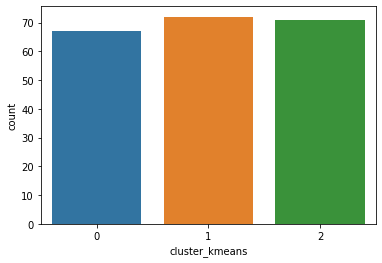

In [172]:
sns.countplot(data=df,x='cluster_kmeans');

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [173]:
df.groupby(['cluster_kmeans'])['spending','advance_payments','probability_of_full_payment','current_balance','credit_limit','min_payment_amt','max_spent_in_single_shopping'].mean()

C:\Users\Sanjana\AppData\Local\Temp\ipykernel_16396\2864156176.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['cluster_kmeans'])['spending','advance_payments','probability_of_full_payment','current_balance','credit_limit','min_payment_amt','max_spent_in_single_shopping'].mean()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster_kmeans,,,,,,,
0,18495.373134,1620.343284,0.884210,6175.686567,36975.373134,363.237313,6041.701493
1,11856.944444,1324.777778,0.848253,5231.750000,28495.416667,474.238889,5101.722222
2,14437.887324,1433.774648,0.881597,5514.577465,32592.253521,270.734085,5120.802817


From the clusters, we can see that the spendings of group '1' is higher than that of grouo '0'.
Their Advance payments, Current balance, Credit limit nad highest shopping expenditure is also higher.
However group '1's minimum montly payment is lower than that of cluster '0'
It is also seen that the Probability of payment done in full by the customer to the bank almost equal between both the clusters.
Business can be imporved by increasing the credit limit of cluster '0' as they are showing promising results even with lower limit. Increase in the crdit limit will have a direct impact on their spending and maximum shopping expenditure. The risk is lower as they are matching the results of the other cluster in terms of Probability of payment done in full by the customer to the bank and their minimum payment amount is higher. 

Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.
Dataset for Problem 2: insurance_part2_data-1.csv

Attribute Information:

1.Target: Claim Status (Claimed)
2.Code of tour firm (Agency_Code)
3.Type of tour insurance firms (Type)
4.Distribution channel of tour insurance agencies (Channel)
5.Name of the tour insurance products (Product)
6.Duration of the tour (Duration in days)
7.Destination of the tour (Destination)
8.Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9.The commission received for tour insurance firm (Commission is in percentage of sales)
10.Age of insured (Age)

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [15]:
df2=pd.read_csv("insurance_part2_data-1.csv")

In [17]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df2.shape

(3000, 10)

In [19]:
objtype =[]
for x in df2.columns:
    if df2[x].dtype == 'object':
        print(x)
        print("**************")
        print(df2[x].value_counts())
        print("\n")
        objtype.append(x)
objtype

Agency_Code
**************
EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


Type
**************
Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


Claimed
**************
No     2076
Yes     924
Name: Claimed, dtype: int64


Channel
**************
Online     2954
Offline      46
Name: Channel, dtype: int64


Product Name
**************
Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64


Destination
**************
ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64




['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [6]:
df2.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [8]:
df2.duplicated().sum()

139

In [6]:
df2=df2.drop_duplicates()


In [10]:
df2.shape

(2861, 10)

In [11]:
def univariateAnalysis_numeric(column):
    if np.dtype(df2[column]) == 'object':
        pass
    else:
        
        plt.figure()
        plt.subplot(2,2,1)
        plt.title("Distribution of " + column)
        plt.hist(df2[column],color='g');
        plt.show()
        plt.subplot(2,2,2)
        plt.title("BoxPlot of " + column)
        sns.boxplot(x=df2[column])
        plt.show()

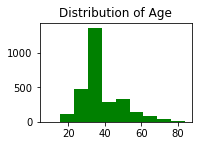

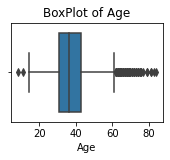

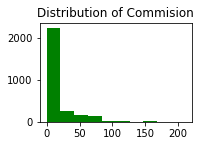

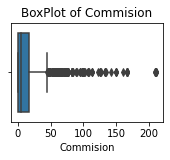

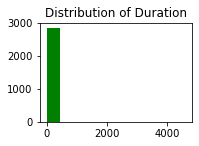

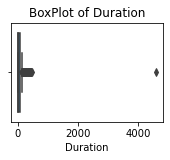

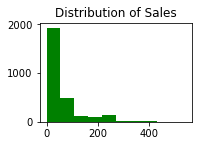

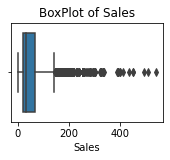

In [12]:
for x in df2.columns:
    univariateAnalysis_numeric(x)

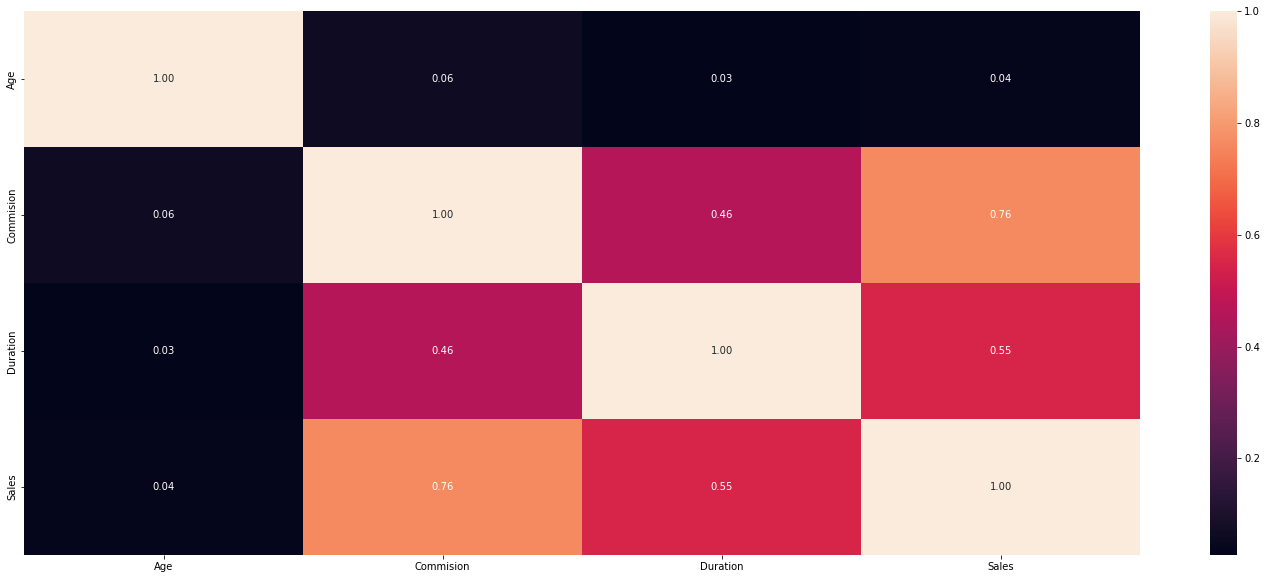

In [13]:
fig = plt.subplots(figsize=(25, 10))
sns.heatmap(df2.corr(), annot=True,fmt='.2f')
plt.show()

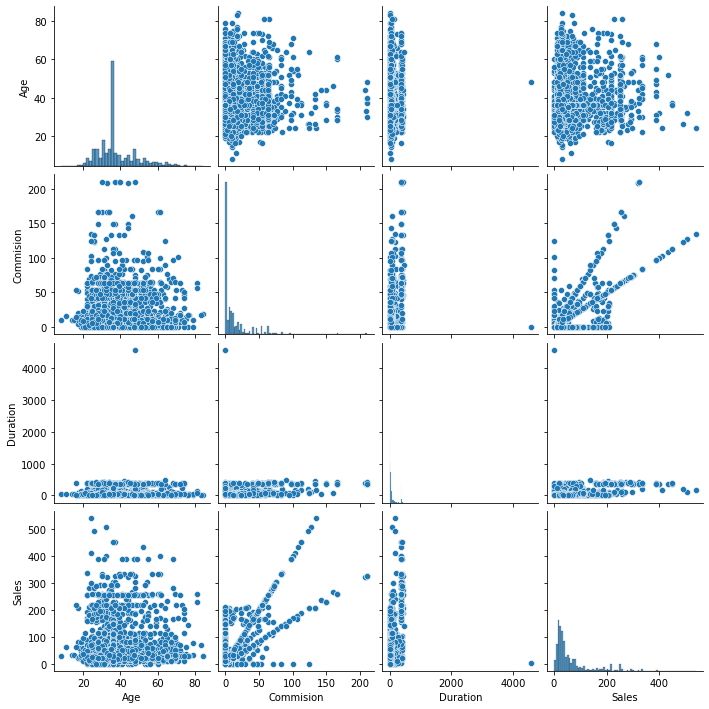

In [14]:
sns.pairplot(data = df2);

C:\Users\Sanjana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sanjana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sanjana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sanjana\anaconda

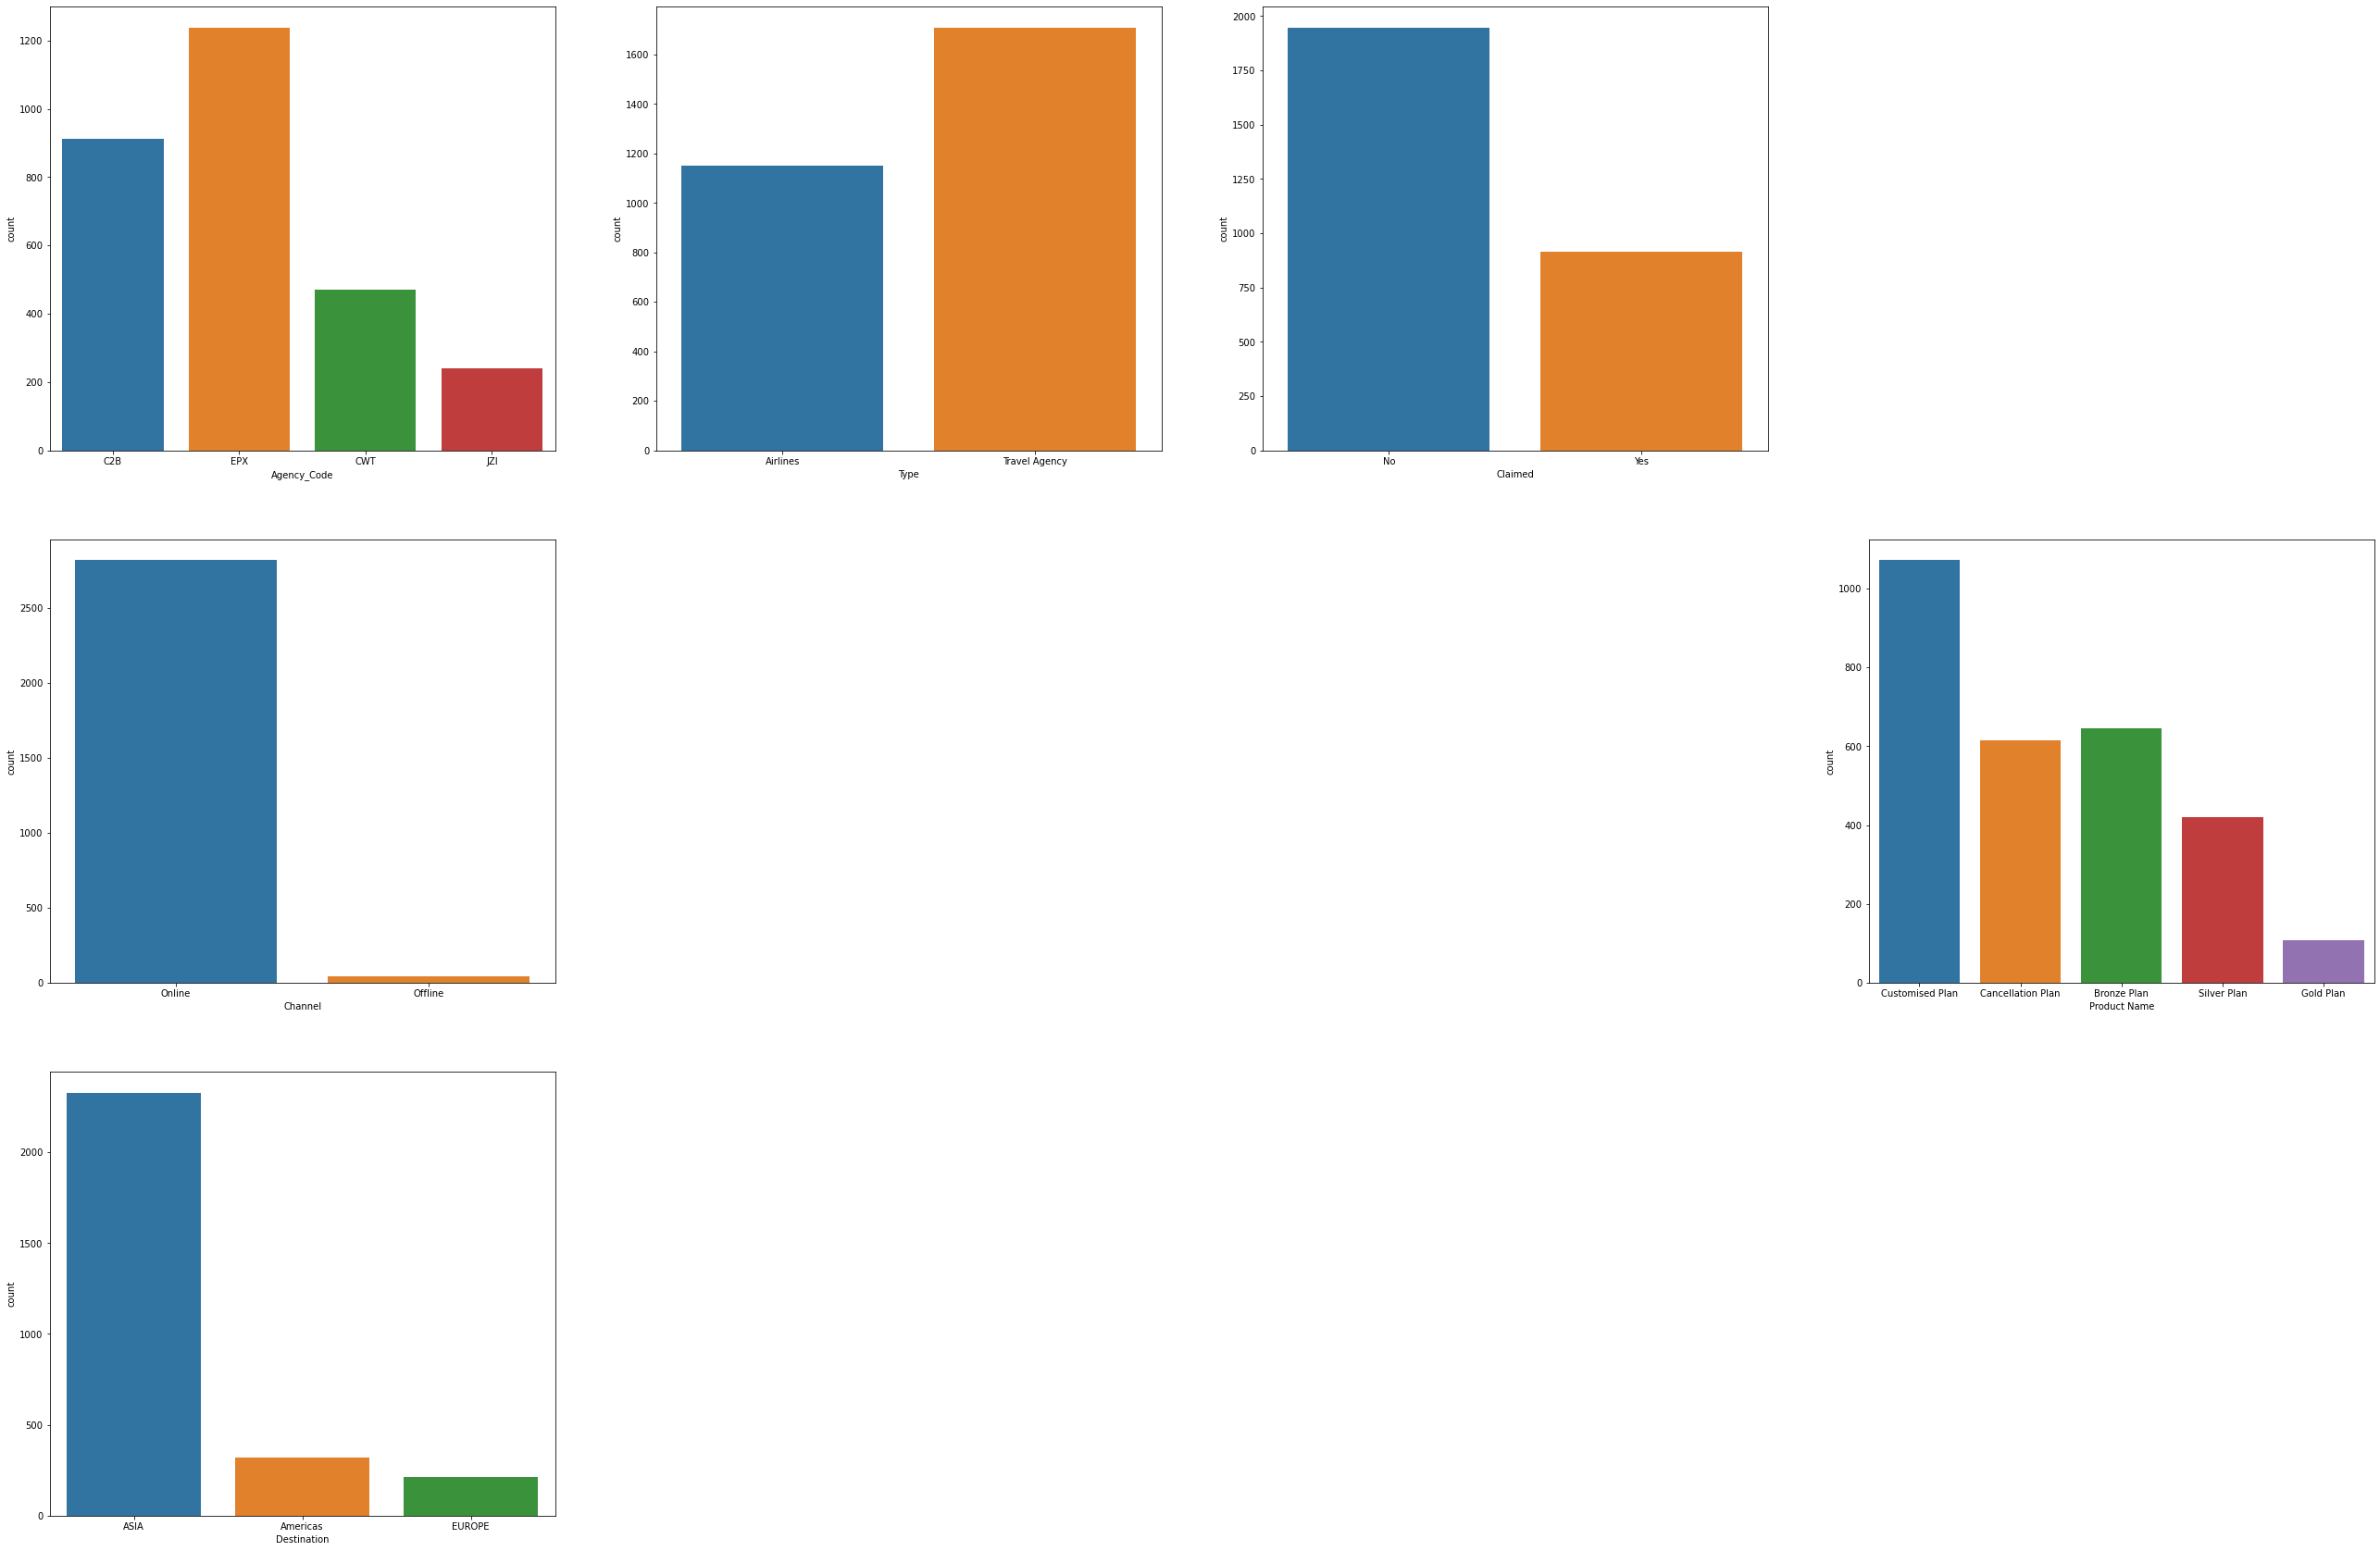

In [15]:
cols = df2.columns
plt.figure(figsize = (45,30))
for i in range(len(cols)):
    if df2[cols[i]].dtype == 'object':
        plt.subplot(3,4,i);        
        sns.countplot(df2[cols[i]])

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

In [3]:
for each in df2.columns:
    if df2[each].dtype=='object':
        df2[each]=pd.Categorical(df2[each]).codes
pd.get_dummies(df2,drop_first=True)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0
...,...,...,...,...,...,...,...,...,...,...
2995,28,1,1,1,166.53,1,364,256.20,3,1
2996,35,0,0,0,13.50,1,5,54.00,3,0
2997,36,2,1,0,0.00,1,54,28.00,2,0
2998,34,0,0,1,7.64,1,39,30.55,0,0


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 193.1 KB


In [4]:
pd.get_dummies(data=df2,drop_first=True)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0
...,...,...,...,...,...,...,...,...,...,...
2995,28,1,1,1,166.53,1,364,256.20,3,1
2996,35,0,0,0,13.50,1,5,54.00,3,0
2997,36,2,1,0,0.00,1,54,28.00,2,0
2998,34,0,0,1,7.64,1,39,30.55,0,0


In [19]:
#independent and dependent variables
X=df2.drop("Claimed",axis=1)
y=df2.pop("Claimed")

In [20]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


In [21]:
#DecisionTreeCLassifier

In [24]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [5,10,15,20],
    'min_samples_leaf': [60,70,100,120], 
    'min_samples_split': [100,150,200,250],
}

dtcl = DecisionTreeClassifier(random_state=0)
dtcl.fit(X_train,train_labels)
grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [25]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 70, 'min_samples_split': 250}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=70, min_samples_split=250,
                       random_state=0)

In [26]:
#Generating tree
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://webgraphviz.com/

In [27]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.623869
Sales         0.295787
Product Name  0.035656
Commision     0.026129
Duration      0.012784
Age           0.005774
Type          0.000000
Channel       0.000000
Destination   0.000000


In [28]:
ytrain_predict=dtcl.predict(X_train)
ytest_predict=dtcl.predict(X_test)

In [29]:
ytrain_predict_prob=dtcl.predict_proba(X_train)
ytest_predict_prob=dtcl.predict_proba(X_test)

AUC: 0.819


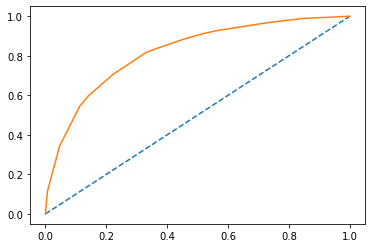

In [30]:
# predict probabilities-Training data
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.781


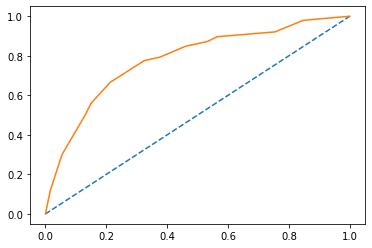

In [31]:
# predict probabilities-Test data
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [210]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1378
           1       1.00      0.98      0.99       624

    accuracy                           0.99      2002
   macro avg       1.00      0.99      0.99      2002
weighted avg       0.99      0.99      0.99      2002



In [32]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       569
           1       0.54      0.48      0.51       290

    accuracy                           0.68       859
   macro avg       0.64      0.64      0.64       859
weighted avg       0.68      0.68      0.68       859



In [33]:
confusion_matrix(train_labels, ytrain_predict)

array([[1378,    0],
       [  11,  613]], dtype=int64)

In [34]:
confusion_matrix(test_labels, ytest_predict)

array([[448, 121],
       [150, 140]], dtype=int64)

In [35]:
cart_test_acc=best_grid.score(X_test,test_labels)
cart_train_acc=best_grid.score(X_train,train_labels)

In [36]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df2=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df2.loc["1"][2],2)
cart_train_recall=round(df2.loc["1"][1],2)
cart_train_precision=round(df2.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  1.0
cart_train_recall  0.98
cart_train_f1  0.99


In [37]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df2=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df2.loc["1"][0],2)
cart_test_recall=round(df2.loc["1"][1],2)
cart_test_f1=round(df2.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.54
cart_test_recall  0.48
cart_test_f1  0.51


In [ ]:
cart_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [38]:
#RANDOM FOREST

In [39]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [6],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [300] ## 100,200
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [40]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [10], 'max_features': [6],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [300]})

In [41]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [42]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=300, random_state=0)

In [43]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

Confuion matrix is: 
[[1238  140]
 [ 245  379]]
Grid score :  0.8076923076923077
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1378
           1       0.73      0.61      0.66       624

    accuracy                           0.81      2002
   macro avg       0.78      0.75      0.76      2002
weighted avg       0.80      0.81      0.80      2002

rf_train_precision  0.73
rf_train_recall  0.61
rf_train_f1  0.66
Area under Curve is 0.8708272859216255


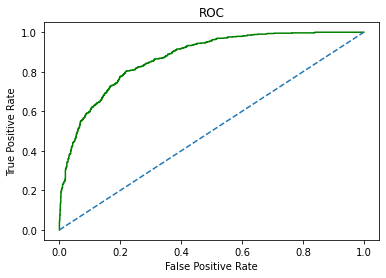

In [44]:
#on training data
print("Confuion matrix is: ")
print(confusion_matrix(train_labels,ytrain_predict))

rf_train_acc=best_grid.score(X_train,train_labels) 
print("Grid score : ", rf_train_acc)

print(classification_report(train_labels,ytrain_predict))
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df2=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df2.loc["1"][0],2)
rf_train_recall=round(df2.loc["1"][1],2)
rf_train_f1=round(df2.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

Confuion matrix is: 
[[499  70]
 [194  96]]
Grid score :  0.6926658905704307
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       569
           1       0.58      0.33      0.42       290

    accuracy                           0.69       859
   macro avg       0.65      0.60      0.61       859
weighted avg       0.67      0.69      0.67       859

rf_test_precision  0.58
rf_test_recall  0.33
rf_test_f1  0.42
Area under Curve is 0.7105508757045027


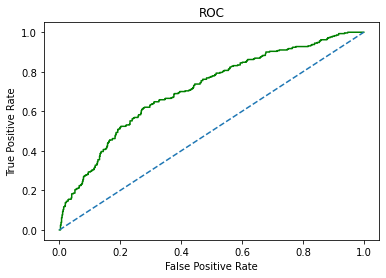

In [65]:
#test data\
print("Confuion matrix is: ")
print(confusion_matrix(test_labels,ytest_predict))
rf_test_acc=best_grid.score(X_test,test_labels)

print("Grid score : ", rf_test_acc)

print(classification_report(test_labels,ytest_predict))

rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df2=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df2.loc["1"][0],2)
rf_test_recall=round(df2.loc["1"][1],2)
rf_test_f1=round(df2.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [46]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.356277
Sales         0.201150
Product Name  0.168515
Commision     0.100771
Duration      0.092925
Age           0.055752
Type          0.012465
Destination   0.009831
Channel       0.002315


In [47]:
#Neural Network Classifier

In [48]:
param_grid = {
    'hidden_layer_sizes': [50,100], # 50, 200
    'max_iter': [1000,2500,5000], #5000,2500
    'solver': ['sgd'], #adam
    'tol': [0.1], 
}

nncl = MLPClassifier(random_state=0)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to weighted avg
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   precision  5 non-null      float64
 1   recall     5 non-null      float64
 2   f1-score   5 non-null      float64
 3   support    5 non-null      float64
dtypes: float64(4)
memory usage: 372.0+ bytes


In [50]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 50, 'max_iter': 1000, 'solver': 'sgd', 'tol': 0.1}

In [51]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=50, max_iter=1000, random_state=0,
              solver='sgd', tol=0.1)

In [52]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)
print(ytrain_predict)
print(ytest_predict)

[0 0 0 ... 1 0 0]
[0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1
 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1
 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 0 

In [53]:
confusion_matrix(train_labels,ytrain_predict)

array([[1217,  161],
       [ 379,  245]], dtype=int64)

In [54]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc.round(3)

0.73

In [55]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1378
           1       0.60      0.39      0.48       624

    accuracy                           0.73      2002
   macro avg       0.68      0.64      0.65      2002
weighted avg       0.71      0.73      0.71      2002



In [56]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.6
nn_train_recall  0.39
nn_train_f1  0.48


Area under Curve is 0.7202217306761937


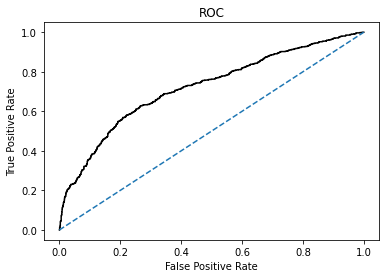

In [57]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [55]:
#test data

[[499  70]
 [194  96]]
0.6926658905704307
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       569
           1       0.58      0.33      0.42       290

    accuracy                           0.69       859
   macro avg       0.65      0.60      0.61       859
weighted avg       0.67      0.69      0.67       859

nn_test_precision  0.58
nn_test_recall  0.33
nn_test_f1  0.42
Area under Curve is 0.7105508757045027
<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=50, max_iter=1000, random_state=0,
              solver='sgd', tol=0.1)>


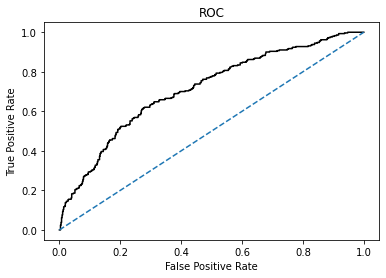

In [58]:
print(confusion_matrix(test_labels,ytest_predict))
nn_test_acc=best_grid.score(X_test,test_labels)
print(nn_test_acc)
print(classification_report(test_labels,ytest_predict))
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)
print(best_grid.score)

2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [69]:
#Comparison of the performance metrics from the 3 models
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)
data.T

,Accuracy,AUC,Recall,Precision,F1 Score
CART Train,0.780719,0.819182,0.98,1.00,0.99
CART Test,0.745052,0.780635,0.48,0.54,0.51
Random Forest Train,0.807692,0.870827,0.61,0.73,0.66
Random Forest Test,0.692666,0.710551,0.33,0.58,0.42
Neural Network Train,0.730270,0.720222,0.39,0.60,0.48
Neural Network Test,0.692666,0.710551,0.33,0.58,0.42


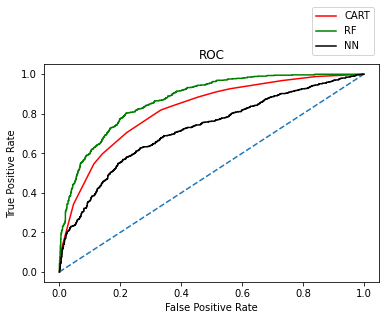

In [60]:
# ROC Curve for the 3 models on the Training data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

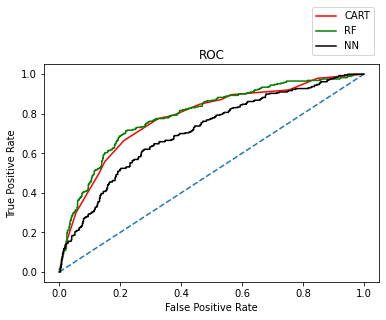

In [61]:
# ROC Curve for the 3 models on the Test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations